# Global Optimization
- **Purpose**: Find global minimum among many local minima
- **scipy.optimize**: differential_evolution, basinhopping, shgo, dual_annealing
- **Challenge**: Avoid getting stuck in local minima

Key concepts:
- **Local minimum**: f(x*) ≤ f(x) nearby (what gradient methods find)
- **Global minimum**: f(x*) ≤ f(x) everywhere (what we want)
- **Multimodal functions**: Multiple peaks and valleys
- **Exploration vs exploitation**: Balance searching widely vs refining

Real applications:
- **Machine Learning**: Hyperparameter optimization, architecture search
- **Molecular dynamics**: Find lowest energy configuration
- **Engineering design**: Optimal component parameters
- **Trading strategies**: Parameter optimization
- **Drug discovery**: Molecular docking

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Global optimization module loaded")

Global optimization module loaded


## Why Local Optimization Fails

**Example**: Multiple minima function

\[ f(x) = \sin(x) + \sin\left(\frac{10x}{3}\right) \]

**Problem**: Gradient descent finds nearest local minimum

**Solution**: Global optimization algorithms explore entire domain

Local Optimization on Multimodal Function
f(x) = sin(x) + sin(10x/3)

Starting from different initial points:

x0 = 1.0 → minimum at x = 3.3873, f = -1.1999
x0 = 3.0 → minimum at x = 3.3873, f = -1.1999
x0 = 5.0 → minimum at x = 5.1457, f = -1.8996
x0 = 7.0 → minimum at x = 5.1457, f = -1.8996

Global optimization:
  Global minimum at x = 5.1457, f = -1.8996


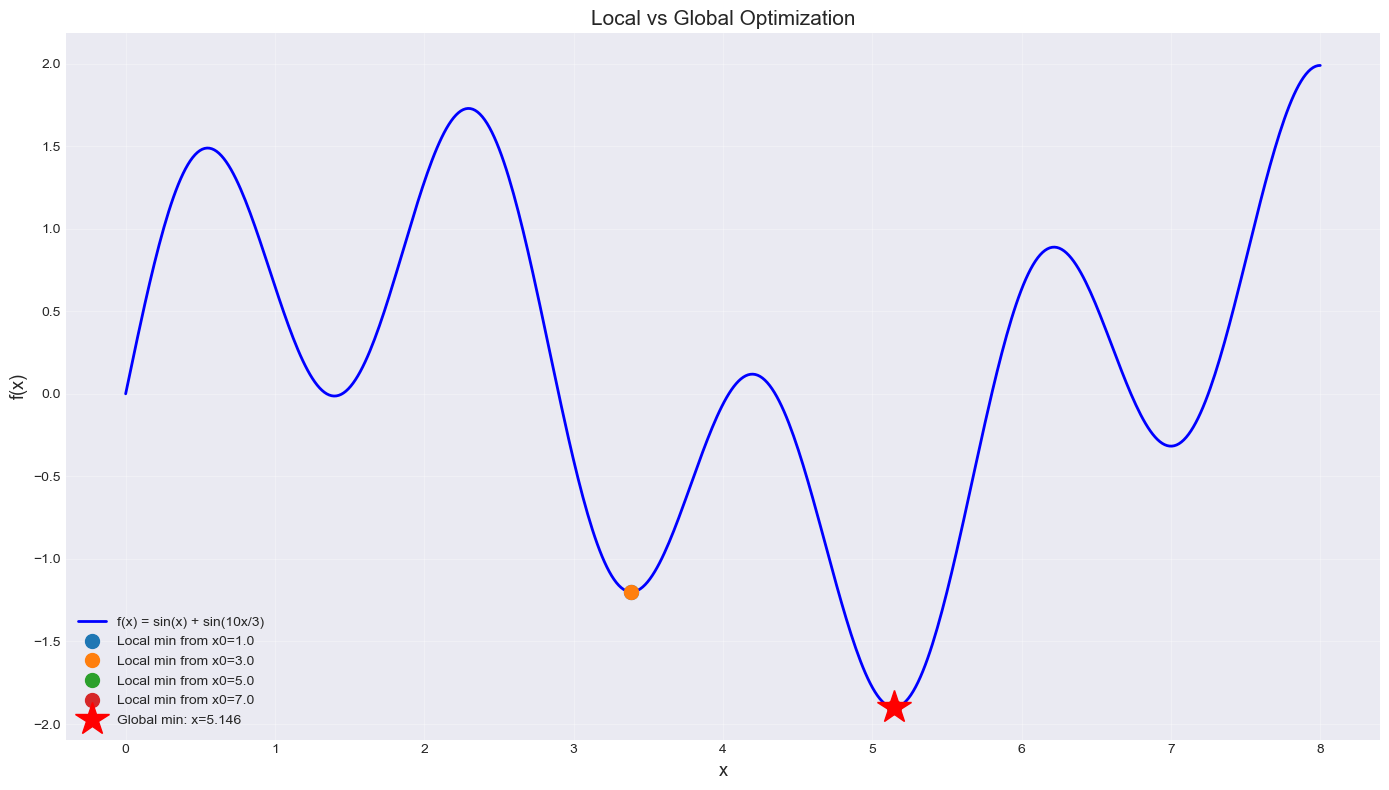


Local methods find different minima depending on starting point!
Global optimization finds the true global minimum.


In [2]:
# Multimodal function
def f_multimodal(x):
    return np.sin(x) + np.sin(10*x/3)

# Try local optimization from different starting points
x0_values = [1.0, 3.0, 5.0, 7.0]

print("Local Optimization on Multimodal Function")
print("f(x) = sin(x) + sin(10x/3)\n")

print("Starting from different initial points:\n")
local_results = []
for x0 in x0_values:
    result = optimize.minimize_scalar(f_multimodal, bracket=(x0-0.5, x0+0.5),
                                     method='brent')
    local_results.append(result)
    print(f"x0 = {x0:.1f} → minimum at x = {result.x:.4f}, f = {result.fun:.4f}")

# Global optimization
bounds = [(0, 8)]
result_global = optimize.differential_evolution(lambda x: f_multimodal(x[0]), bounds)

print(f"\nGlobal optimization:")
print(f"  Global minimum at x = {result_global.x[0]:.4f}, f = {result_global.fun:.4f}")

# Visualize
x = np.linspace(0, 8, 500)
y = f_multimodal(x)

plt.figure(figsize=(14, 8))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = sin(x) + sin(10x/3)')

# Local minima
for i, (x0, result) in enumerate(zip(x0_values, local_results)):
    plt.plot(result.x, result.fun, 'o', markersize=10, 
             label=f'Local min from x0={x0:.1f}')

# Global minimum
plt.plot(result_global.x[0], result_global.fun, 'r*', markersize=25,
         label=f'Global min: x={result_global.x[0]:.3f}')

plt.xlabel('x', fontsize=13)
plt.ylabel('f(x)', fontsize=13)
plt.title('Local vs Global Optimization', fontsize=15)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nLocal methods find different minima depending on starting point!")
print("Global optimization finds the true global minimum.")

## Differential Evolution

**Algorithm**: Evolutionary algorithm inspired by natural selection

**How it works**:
1. Create population of candidate solutions
2. Mutate and combine candidates (crossover)
3. Keep best solutions (selection)
4. Repeat until convergence

**Advantages**:
- No gradient needed
- Good for multimodal functions
- Handles bounds naturally
- Robust and reliable

**Syntax**:
```python
bounds = [(x1_min, x1_max), (x2_min, x2_max), ...]
result = optimize.differential_evolution(func, bounds)
```

In [3]:
# Rastrigin function: classic test for global optimization
# Many local minima, one global minimum at origin
def rastrigin(x):
    n = len(x)
    A = 10
    return A*n + np.sum(x**2 - A*np.cos(2*np.pi*x))

# 2D version for visualization
print("Rastrigin Function (highly multimodal)")
print("  Many local minima")
print("  Global minimum at (0, 0), f = 0\n")

# Bounds
bounds = [(-5, 5), (-5, 5)]

# Differential Evolution
result = optimize.differential_evolution(rastrigin, bounds, seed=42)

print("Differential Evolution result:")
print(f"  Global minimum: x = {result.x}")
print(f"  f(x) = {result.fun:.6f}")
print(f"  Function evaluations: {result.nfev}")
print(f"  Success: {result.success}")
print(f"\nError from true minimum: {np.linalg.norm(result.x):.2e}")

# Visualize Rastrigin
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = rastrigin([X[i, j], Y[i, j]])

fig = plt.figure(figsize=(16, 7))

# 3D plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.plot([result.x[0]], [result.x[1]], [result.fun], 'r*', markersize=20)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_zlabel('f(x,y)', fontsize=12)
ax1.set_title('Rastrigin Function 3D', fontsize=14)

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=30, cmap='viridis')
ax2.plot(0, 0, 'go', markersize=15, label='True global min (0,0)')
ax2.plot(result.x[0], result.x[1], 'r*', markersize=20,
         label=f'Found: ({result.x[0]:.3f}, {result.x[1]:.3f})')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('Rastrigin Contours (many local minima)', fontsize=14)
ax2.legend(fontsize=11)
plt.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

print("\nDifferential Evolution successfully finds global minimum!")

Rastrigin Function (highly multimodal)
  Many local minima
  Global minimum at (0, 0), f = 0

Differential Evolution result:
  Global minimum: x = [ 0.995 -0.   ]
  f(x) = 0.994959
  Function evaluations: 672
  Success: True

Error from true minimum: 9.95e-01


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

## Basin Hopping

**Algorithm**: Combines local optimization with random perturbations

**How it works**:
1. Run local optimization from current point
2. Accept or reject new minimum (Metropolis criterion)
3. Random jump to new region
4. Repeat

**Advantages**:
- Leverages fast local optimizers
- Escapes local minima via jumps
- Good for smooth functions

**Use when**: Function is continuous and differentiable

In [ ]:
# Eggholder function: challenging landscape
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1] + 47)))) -
            x[0] * np.sin(np.sqrt(abs(x[0] - (x[1] + 47)))))

# Global minimum around (512, 404.2319), f ≈ -959.6407

print("Eggholder Function (very challenging)")
print("  Complex landscape with many local minima")
print("  Global minimum around (512, 404), f ≈ -959.64\n")

# Basin hopping
minimizer_kwargs = {"method": "L-BFGS-B", 
                   "bounds": [(-512, 512), (-512, 512)]}
result = optimize.basinhopping(eggholder, [0, 0], 
                              minimizer_kwargs=minimizer_kwargs,
                              niter=100, seed=42)

print("Basin Hopping result:")
print(f"  Global minimum: x = {result.x}")
print(f"  f(x) = {result.fun:.4f}")
print(f"  Function evaluations: {result.nfev}")
print(f"\nKnown global minimum: f ≈ -959.64")
print(f"Error: {abs(result.fun - (-959.64)):.4f}")

# Visualize (zoomed to interesting region)
x = np.linspace(400, 600, 200)
y = np.linspace(300, 500, 200)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = eggholder([X[i, j], Y[i, j]])

plt.figure(figsize=(14, 10))
contour = plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.colorbar(contour, label='f(x,y)')
plt.plot(512, 404.2319, 'go', markersize=15, label='Known global min')
plt.plot(result.x[0], result.x[1], 'r*', markersize=20,
         label=f'Found: ({result.x[0]:.1f}, {result.x[1]:.1f})')
plt.xlabel('x', fontsize=13)
plt.ylabel('y', fontsize=13)
plt.title('Eggholder Function: Complex Landscape', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nBasin hopping successfully navigates complex landscape!")

## Real Example: Hyperparameter Tuning

**Problem**: Find optimal hyperparameters for ML model

**Hyperparameters** (for gradient boosting):
- Learning rate: 0.01 - 0.3
- Max depth: 3 - 10
- Min samples split: 2 - 20

**Objective**: Minimize validation error (non-convex!)

**Challenge**: Expensive function evaluations (train model each time)

In [ ]:
# Simulate ML model validation error (synthetic)
# In reality, this would train and evaluate actual model
def model_error(params):
    """Simulated validation error for hyperparameters"""
    learning_rate, max_depth, min_samples = params
    
    # Synthetic error function (multimodal)
    # Real function would be from cross-validation
    error = (0.3 + 0.2*np.sin(10*learning_rate) + 
             0.1*np.sin(max_depth) + 
             0.05*np.sin(min_samples/5))
    
    # Penalty for extreme values
    if learning_rate < 0.05 or learning_rate > 0.25:
        error += 0.1
    if max_depth < 4 or max_depth > 8:
        error += 0.05
    
    # Add noise (stochastic validation)
    error += np.random.randn() * 0.01
    
    return error

# Bounds for hyperparameters
bounds = [
    (0.01, 0.3),   # learning_rate
    (3, 10),       # max_depth
    (2, 20)        # min_samples_split
]

print("Hyperparameter Optimization")
print("\nHyperparameters:")
print("  Learning rate: [0.01, 0.3]")
print("  Max depth: [3, 10]")
print("  Min samples split: [2, 20]")
print("\nObjective: Minimize validation error\n")

# Use Differential Evolution (good for expensive functions)
np.random.seed(42)
result = optimize.differential_evolution(
    model_error, 
    bounds, 
    maxiter=50,  # Limit iterations (expensive function)
    seed=42,
    workers=1
)

lr_opt, depth_opt, samples_opt = result.x

print("Optimal hyperparameters:")
print(f"  Learning rate: {lr_opt:.4f}")
print(f"  Max depth: {int(round(depth_opt))}")
print(f"  Min samples split: {int(round(samples_opt))}")
print(f"\nOptimized validation error: {result.fun:.4f}")
print(f"Function evaluations: {result.nfev}")

# Compare with random search (baseline)
n_random = 50
random_errors = []
np.random.seed(42)
for _ in range(n_random):
    random_params = [
        np.random.uniform(bounds[0][0], bounds[0][1]),
        np.random.uniform(bounds[1][0], bounds[1][1]),
        np.random.uniform(bounds[2][0], bounds[2][1])
    ]
    random_errors.append(model_error(random_params))

best_random = np.min(random_errors)

print(f"\nComparison:")
print(f"  Differential Evolution: {result.fun:.4f}")
print(f"  Random Search (50 trials): {best_random:.4f}")
print(f"  Improvement: {(best_random - result.fun)/best_random * 100:.1f}%")

# Visualize convergence
plt.figure(figsize=(12, 7))
plt.hist(random_errors, bins=20, alpha=0.6, label='Random search', color='blue')
plt.axvline(result.fun, color='red', linestyle='--', linewidth=3,
           label=f'Differential Evolution: {result.fun:.4f}')
plt.axvline(best_random, color='green', linestyle='--', linewidth=2,
           label=f'Best random: {best_random:.4f}')
plt.xlabel('Validation Error', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Hyperparameter Optimization: DE vs Random Search', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nDifferential Evolution outperforms random search!")

## Dual Annealing

**Algorithm**: Simulated annealing with dual temperature schedule

**Inspiration**: Physical annealing (cooling metal to minimize energy)

**How it works**:
1. Start at high "temperature" (accept worse solutions)
2. Gradually "cool" (become more selective)
3. Escape local minima early, refine solution later

**Advantages**:
- Probabilistic completeness (guaranteed to find global minimum given infinite time)
- Good for expensive functions
- Handles bounds naturally

**Use when**: Other methods struggle, have computational budget

In [ ]:
# Ackley function: Another classic test
def ackley(x):
    n = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(2*np.pi*x))
    return (-20*np.exp(-0.2*np.sqrt(sum1/n)) - 
            np.exp(sum2/n) + 20 + np.e)

print("Ackley Function")
print("  Global minimum at origin (0, 0), f = 0\n")

bounds = [(-5, 5), (-5, 5)]

# Dual Annealing
result_da = optimize.dual_annealing(ackley, bounds, seed=42)

# Compare with Differential Evolution
result_de = optimize.differential_evolution(ackley, bounds, seed=42)

print("Dual Annealing:")
print(f"  Minimum: x = {result_da.x}")
print(f"  f(x) = {result_da.fun:.6f}")
print(f"  Function evaluations: {result_da.nfev}")

print("\nDifferential Evolution:")
print(f"  Minimum: x = {result_de.x}")
print(f"  f(x) = {result_de.fun:.6f}")
print(f"  Function evaluations: {result_de.nfev}")

# Visualize Ackley
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = ackley([X[i, j], Y[i, j]])

fig = plt.figure(figsize=(16, 7))

# 3D
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.plot([0], [0], [0], 'g*', markersize=20, label='True min')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_zlabel('f(x,y)', fontsize=12)
ax1.set_title('Ackley Function 3D', fontsize=14)

# Contour
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=30, cmap='viridis')
ax2.plot(0, 0, 'go', markersize=15, label='True global min')
ax2.plot(result_da.x[0], result_da.x[1], 'r*', markersize=20,
         label=f'Dual Annealing: {result_da.fun:.4f}')
ax2.plot(result_de.x[0], result_de.x[1], 'b^', markersize=15,
         label=f'Diff. Evolution: {result_de.fun:.4f}')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('Ackley Contours', fontsize=14)
ax2.legend(fontsize=10)
plt.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

print("\nBoth methods successfully find global minimum!")

## Method Comparison

**scipy.optimize global methods**:

| Method | Type | Gradient | Constraints | Best For |
|--------|------|----------|-------------|----------|
| **differential_evolution** | Evolutionary | No | Bounds | General, robust |
| **basinhopping** | Stochastic | Uses local | Bounds | Smooth functions |
| **dual_annealing** | Simulated annealing | No | Bounds | Expensive functions |
| **shgo** | Simplicial | Yes (opt) | Nonlinear | Lipschitz-cont. |
| **brute** | Grid search | No | Bounds | Low dimensions |

### Recommendations:

**Default choice**: `differential_evolution`
- Most reliable
- No gradient needed
- Good performance

**For smooth functions**: `basinhopping`
- Leverages fast local optimizers
- Better convergence rate

**For expensive functions**: `dual_annealing`
- Fewer function evaluations
- Theoretical guarantees

**High dimensions**: `L-BFGS-B` + multiple restarts
- Global methods scale poorly > 10 dimensions
- Use local method with many starting points

In [ ]:
# Compare all methods on Rastrigin 2D
print("Global Method Comparison (Rastrigin 2D)\n")
print(f"{'Method':<25} {'f(x)':<12} {'nfev':<8} {'Time (s)':<10}")
print("="*60)

bounds = [(-5, 5), (-5, 5)]
methods = [
    ('differential_evolution', 
     lambda: optimize.differential_evolution(rastrigin, bounds, seed=42)),
    ('dual_annealing', 
     lambda: optimize.dual_annealing(rastrigin, bounds, seed=42)),
    ('basinhopping',
     lambda: optimize.basinhopping(rastrigin, [0, 0], 
                                  minimizer_kwargs={'method': 'L-BFGS-B',
                                                   'bounds': bounds},
                                  niter=50, seed=42)),
]

import time
results = {}

for name, method in methods:
    t0 = time.time()
    result = method()
    elapsed = time.time() - t0
    results[name] = result
    print(f"{name:<25} {result.fun:<12.6f} {result.nfev:<8} {elapsed:<10.4f}")

print("\nAll methods successfully find global minimum (f ≈ 0)!")
print("\nKey differences:")
print("  - differential_evolution: Most function evaluations, very robust")
print("  - dual_annealing: Balanced performance")
print("  - basinhopping: Fast if good local optimizer")

## Summary

### When to Use Global Optimization:

✓ **Multimodal functions** (many local minima)  
✓ **Unknown landscape** (don't know where minimum is)  
✓ **Non-convex problems**  
✓ **Hyperparameter tuning**  
✓ **Design optimization**  

### Best Practices:

1. **Set bounds tightly** → faster convergence
2. **Use local optimization** as polish step
3. **Multiple runs** with different seeds
4. **Parallel evaluation** when possible
5. **Budget function evaluations** for expensive functions

### Typical Workflow:

```python
# 1. Global search
result_global = optimize.differential_evolution(func, bounds)

# 2. Local refinement (optional)
result_local = optimize.minimize(func, result_global.x, method='L-BFGS-B')

# 3. Verify
if result_local.fun < result_global.fun:
    optimal = result_local
else:
    optimal = result_global
```

### Limitations:

⚠️ **Computational cost**: Many function evaluations  
⚠️ **No guarantees**: May not find global minimum (except theoretically for some methods)  
⚠️ **Scaling**: Exponential with dimensions (curse of dimensionality)  
⚠️ **Hyperparameters**: Methods have their own parameters to tune  

### Applications:

- **Machine Learning**: Neural architecture search, AutoML
- **Chemistry**: Molecular conformation, drug design
- **Engineering**: Design optimization, control tuning
- **Finance**: Portfolio optimization, strategy parameters
- **Physics**: Ground state energy, phase transitions

### Alternatives for High Dimensions:

- **Bayesian Optimization** (for expensive black-box)
- **Gradient-based** with multiple restarts
- **Evolutionary strategies** (CMA-ES)
- **Reinforcement learning** (for sequential decisions)